### Université Virtuelle du Tchad (UVT)
#### Niveau : Master 1 Sécurité Logicielle
#### Matière : Machine Learning et Deep Learning
#### Année accamdémique : 2022-2023
#### Exercice d'application

##### Etudiant :  __LAGRE GABBA BERTRAND__
#### Enseignant : Pr. MOUSSA M.BOUKAR
##### github: https://github.com/FoubaDev/TpML_UVT.git

##### Lien de l'application streamlit : https://uvt-income-prediction.streamlit.app/


##### 1. Description :
En utilisant l'ensemble de données appelé __canada_per_income__ , entraînez votre modèle à l'aide d'un modèle de __regression linéaire__ a variable unique pour prédire le revenu moyen par personne des années 2022, 2023 et 2024.

##### 2. Importation de bibliothèques nécéssaires 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

#### 2. Lecture du jeu de données

In [2]:
def wrangle(filepath):
    
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Fill nan value
    df.fillna(df.mean(),inplace=True)
    
    return df

In [3]:
# Now let's call our wrangle function on our csv file
df = wrangle("TpML_UVT/Canada_per_capital_income.csv")

In [4]:
# Verify the types of our dataframe
df.dtypes

year        int64
income    float64
dtype: object

Nous faisons face aux données de type numérique (int64 pour __year__ et float64 pour  __income__).

In [5]:
# now let's us describe our dataframe to see some details(like, min, max , standard deviation, mean, q1,q3)
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


#### 3. Analyse Exploratoire et Visualisation des données

In [6]:
# Create a variable named columns that contains all columns in the dataset
columns = df.columns

Il est nécéssaire de voir la distribution de chaque variable. Pour cela, nous allons utiliser le boxplot.

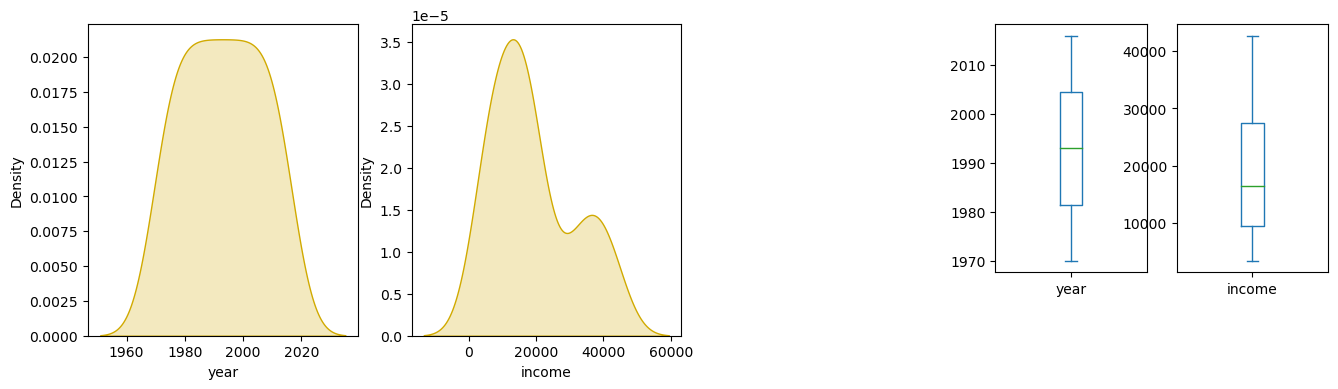

In [7]:
plt.figure(figsize=(16,38))

for i, col in enumerate(columns, 1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color = '#d1aa00', fill = True, warn_singular=False)
    plt.subplot(10,7,i+5)
    df[col].plot.box()
plt.tight_layout()
plt.show()


Nous avons précédement fait le __describe__ de notre dataframe. Nous avons une connaissance sur la valeur minimum, maximum et la moyenne. Ainsi, decoupons la variable __income__ en quatre (04) catégories (bas, moyen, élévé et très élevé)

In [8]:
# let's create a column called class that can help us to see the kinf of risk we can face
def income_class(income):
    if (income >= 3399.299037 and income < 9526.914515):
        return "Revenu bas"
    elif (income >= 9526.914515 and income < 16426.725480):
        return "Revenu moyen"
    elif (income >= 16426.725480  and income < 27458.601420):
        return "Revenu élevé"
    else:
        return "Revenu très élevé"

df['Income_Class'] = df['income'].apply(income_class)

Maintenant, visualisons la repartion de la classe de revenus suivant les années.

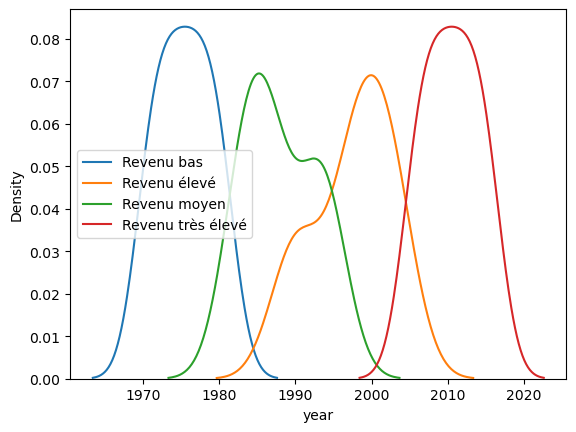

In [9]:
# we can see the impact of the of temp on our target
sns.kdeplot(df.loc[df['Income_Class']=='Revenu bas','year'], label='Revenu bas')
sns.kdeplot(df.loc[df['Income_Class']=='Revenu élevé','year'], label='Revenu élevé')
sns.kdeplot(df.loc[df['Income_Class']=='Revenu moyen','year'], label='Revenu moyen')
sns.kdeplot(df.loc[df['Income_Class']=='Revenu très élevé','year'], label='Revenu très élevé')
plt.legend()
plt.show()

Au fil des années, nous voyons une repartition de revenus. La tendance varie d'une année à une autre. Cependant, les questions que l'on peut se poser sont celles-ci :  __Qu'est ce qui est à l'origine de la variation de revenus durant ces années ? Quel élément determine le montant du revenu ?__

#### 4. Entrainement du Modèle

Dans la description de l'exercice, il est bien démandé d'utiliser la régression linéaire comme modèle.
Commençons par déterminer notre cible(__target__) et notre feature.

In [10]:
# x is variable that stocks the content of year
x = df["year"].values.reshape(-1, 1)

# y our targuet (income)
y = df['income']


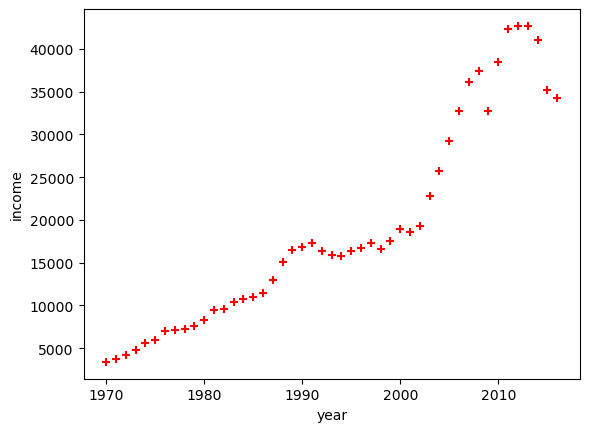

In [11]:
%matplotlib inline
plt.xlabel("year")
plt.ylabel("income")
plt.scatter(df.year, df.income, color = "red", marker="+")

In [12]:
# Declare varaibles for training. 
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.3,random_state=42)

In [13]:
# Declaration of model
model = LinearRegression()

# Fiting  our model
model.fit(x_train, y_train)



LinearRegression()

In [14]:
y_pred_training = model.predict(x_train)
y_pred_training[:5]

array([10641.98279432, 13923.23495978, 36071.68707663, 12282.60887705,
        7360.73062886])

In [15]:
y_pred_test = model.predict(x_test)
y_pred_test[:5]

array([22126.36537343, 31970.12186981, 21306.05233206, 35251.37403527,
       19665.42624933])

In [16]:
linear_score = round(r2_score(y_test,y_pred_test)*100,4)
print(f"Le score  est  de {linear_score} %:")

Le score  est  de 90.0571 %:


In [17]:
mae = mean_absolute_error(y_pred_test, y_test)
print("Training MAE:", round(mae, 2))

Training MAE: 3162.93


Maintenant,  nous allons extraire l'__intercept__ et le __coéfficient__.

In [18]:
# Extract intercept
intercept = round(model.intercept_, 2)
print("The intercept is ", intercept)

# Extract coefficient
coefficient = round(model.coef_[0], 2)
print("The coefficient is ", coefficient)


The intercept is  -1616038.78
The coefficient is  820.31


Réecrivons l'équation  linéaire qui va déterminer la valeur du revenu.

In [19]:
print("income = {}*year{}".format(coefficient, +(intercept)))

income = 820.31*year-1616038.78


In [20]:
verification = model.predict([[2024]])
print(verification)

[44274.81749028]


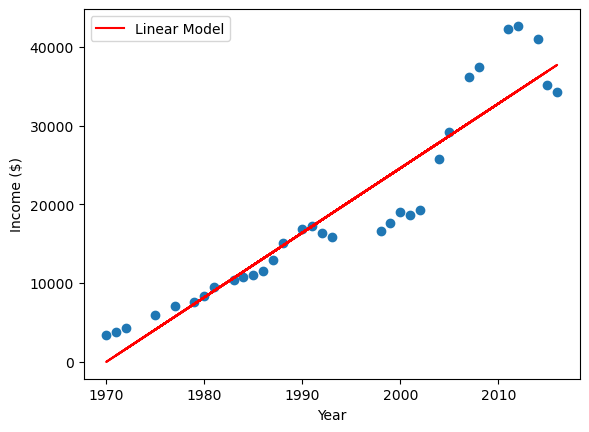

In [21]:
plt.plot(x_train,model.predict(x_train),color="r",label="Linear Model")
plt.scatter(x_train, y_train)
plt.xlabel("Year")
plt.ylabel("Income ($)")
plt.legend()

Nous voyons que les points ne suivent  pas totalement la ligne du modèle de regression. Ceci est dû à la quantité insuffisante du jeux de données.  Il faut donc un grand de nombre de données pour avoir un bon entrainement et une bonne prédiction.

In [22]:
d = pd.read_csv("TpML_UVT/row_to_complete.csv")
d

,year
0,2022
1,2023
2,2024


In [23]:
p = model.predict(d)
d['income'] = p
d

,year,income
0,2022,42634.191408
1,2023,43454.504449
2,2024,44274.817490


Enregistrons notre resulat dans un fichier nommmé __predicition.csv__.

In [24]:
d.to_csv("prediction.csv")

Nous pouvons maintenant, sauvegarder notre modèle dans un fichier __.sav__ pour l'utilser lors du deploiment avec streamlit.

In [25]:
joblib.dump(model, "canada_per_capital.sav")

['canada_per_capital.sav']